In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("talk")
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,6)

In [21]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [22]:
test = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))
#we have shop_id and item_id

In [23]:
display(transactions.head())
display(items.head())
display(item_categories.head())
display(shops.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [154]:
data.count().max()

2935848

In [155]:
transactions.count().max()

2935849

First, let's focus only on transactions. and item category. THe other dfs just have product info. But the names might be useful later.

In [24]:
data = (
    transactions.merge(items[["item_id", "item_category_id"]])

    .assign(date_c=lambda x: pd.to_datetime(x.date, format="%d.%m.%Y"))
    .assign(month=lambda x: x.date_c.dt.month, year=lambda x: x.date_c.dt.year,
            day=lambda x: x.date_c.dt.day, weekday=lambda x: x.date_c.dt.weekday, week=lambda x: x.date_c.dt.week)
    .assign(money=lambda x: x.eval("item_price*item_cnt_day"))
    .query("item_price>0")

)

## Changes in time

In [25]:
data.date_c.describe()

count                 2935848
unique                   1034
top       2013-12-28 00:00:00
freq                     9434
first     2013-01-01 00:00:00
last      2015-10-31 00:00:00
Name: date_c, dtype: object

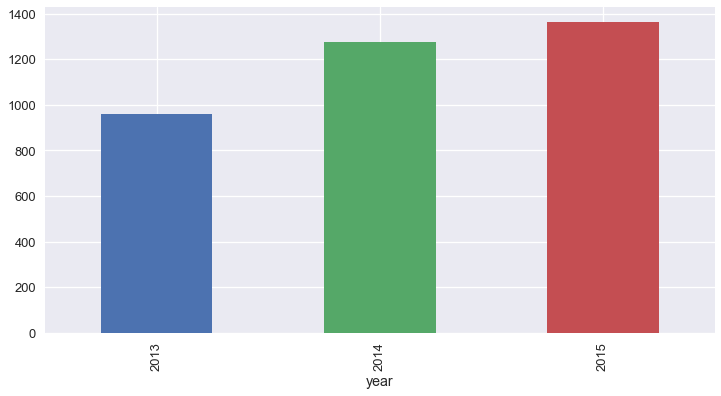

In [33]:
data.groupby("year").money.mean().plot.bar()

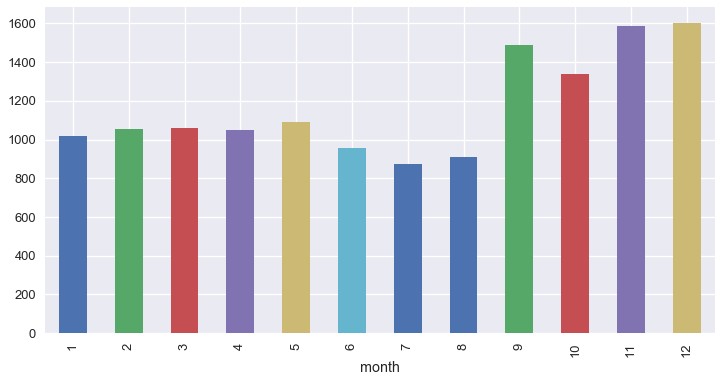

In [32]:
data.groupby("month").money.mean().plot.bar()

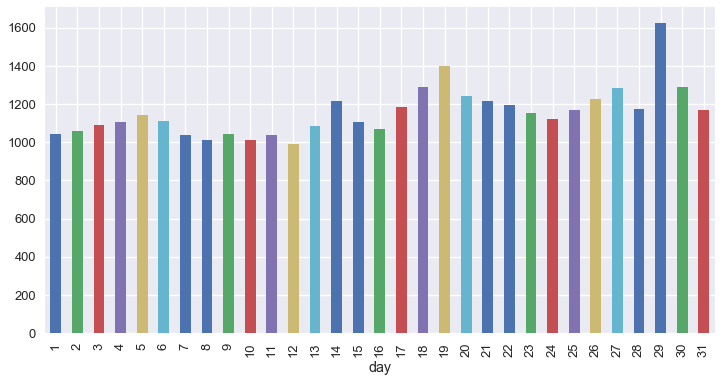

In [34]:
#Probably because there are less 31st. People tend to buy more near the end, seemingly.
data.groupby("day").money.mean().plot.bar()

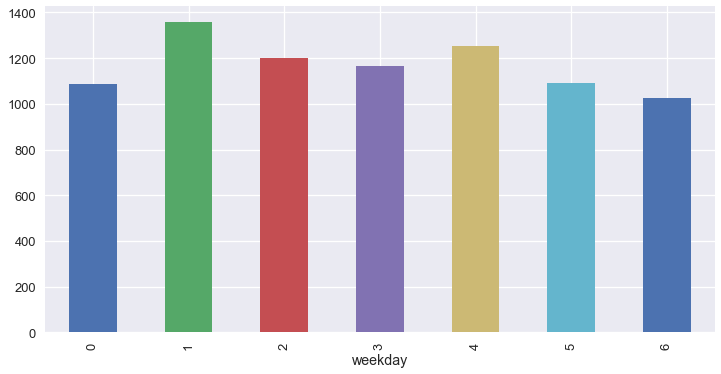

In [35]:
data.groupby("weekday").money.mean().plot.bar()

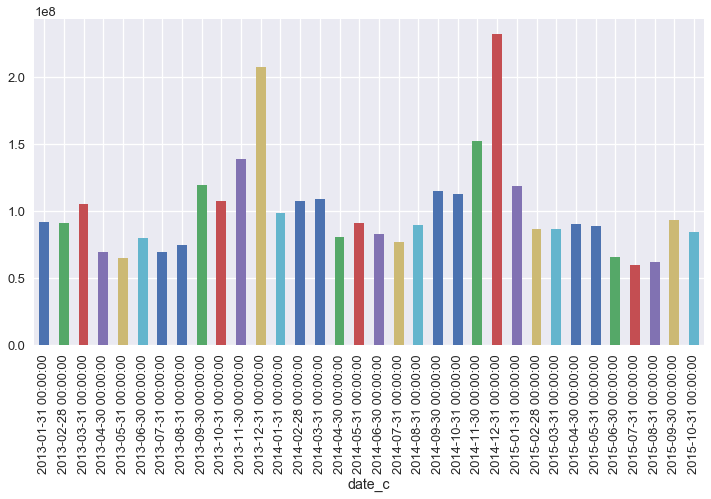

In [30]:
data.set_index("date_c").resample("M").money.sum().plot.bar()

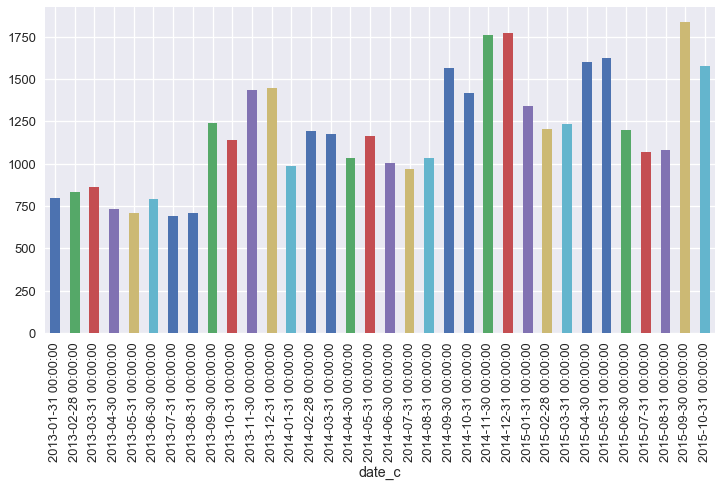

In [37]:
data.set_index("date_c").resample("M").money.mean().plot.bar()

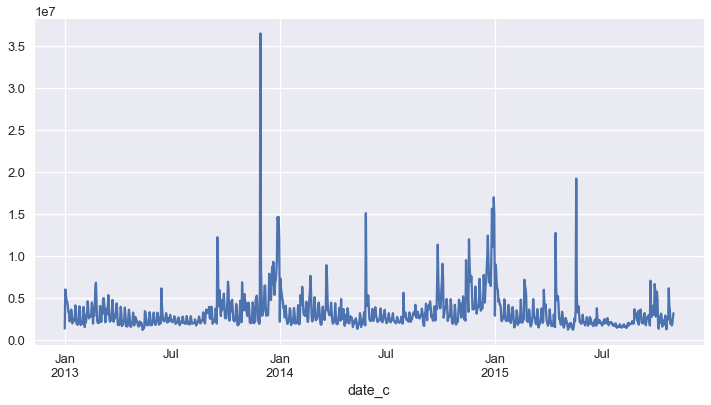

In [42]:
data.set_index("date_c").resample("D").money.sum().plot()

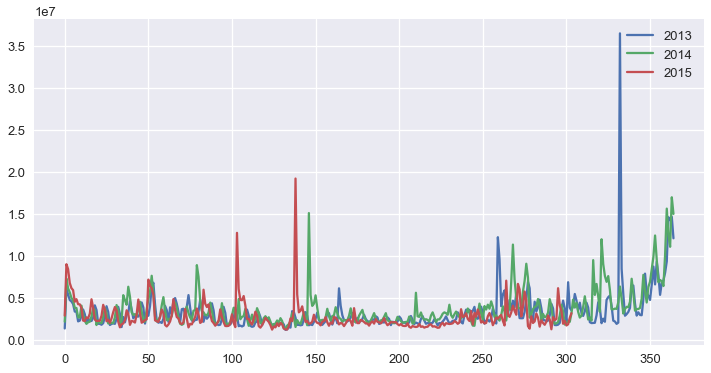

In [52]:
data.query("year==2013").set_index("date_c").resample("D").money.sum().reset_index(drop=True).plot()
data.query("year==2014").set_index("date_c").resample("D").money.sum().reset_index(drop=True).plot()
data.query("year==2015").set_index("date_c").resample("D").money.sum().reset_index(drop=True).plot()
plt.legend(["2013","2014","2015"])

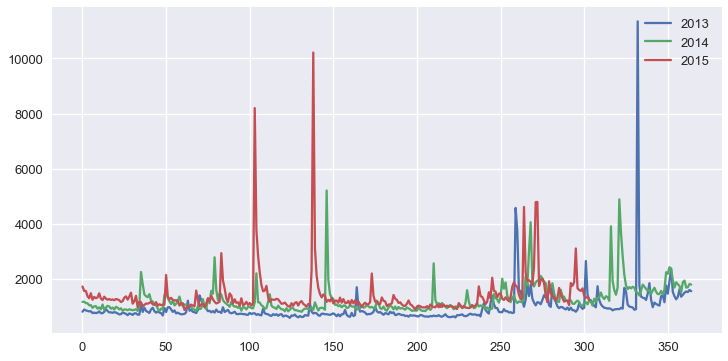

In [53]:
data.query("year==2013").set_index("date_c").resample("D").money.mean().reset_index(drop=True).plot()
data.query("year==2014").set_index("date_c").resample("D").money.mean().reset_index(drop=True).plot()
data.query("year==2015").set_index("date_c").resample("D").money.mean().reset_index(drop=True).plot()
plt.legend(["2013","2014","2015"])

What happened in Christmas 2013?
What are those jumps around July?

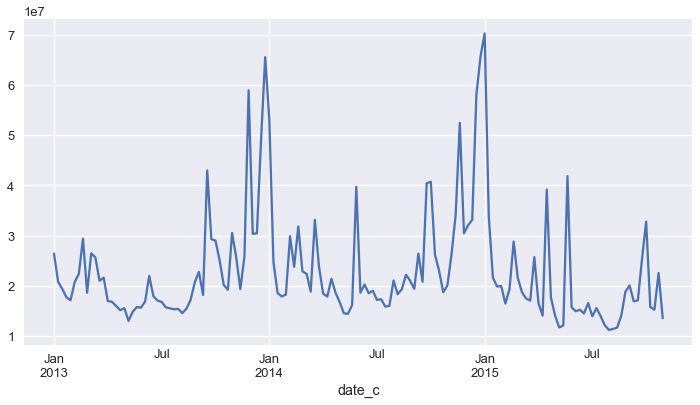

In [55]:
data.set_index("date_c").resample("W").money.sum().plot()

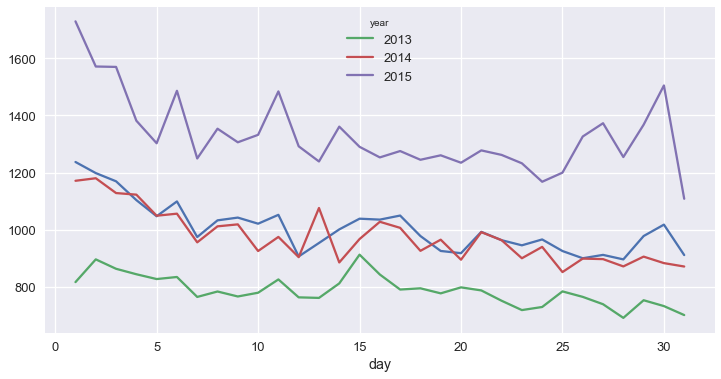

In [74]:
data.query("month==1").groupby("day").money.mean().plot()
data.query("month==1").groupby(["day","year"]).money.mean().unstack().plot(ax=plt.gca())

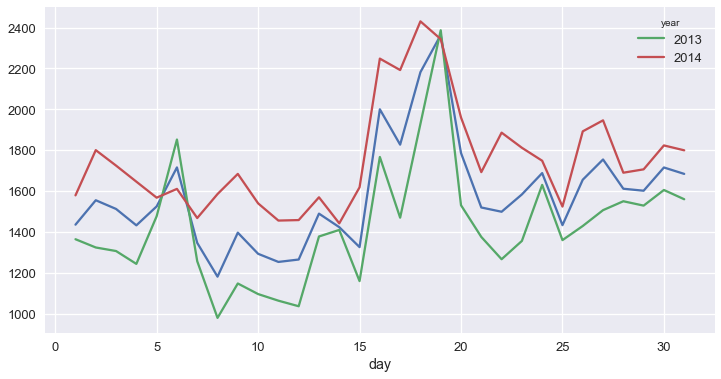

In [73]:
data.query("month==12").groupby("day").money.mean().plot()
data.query("month==12").groupby(["day","year"]).money.mean().unstack().plot(ax=plt.gca())

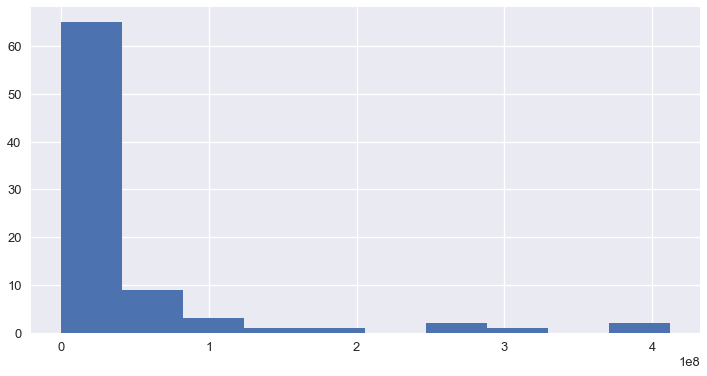

In [78]:
data.groupby("item_category_id").money.sum().hist()

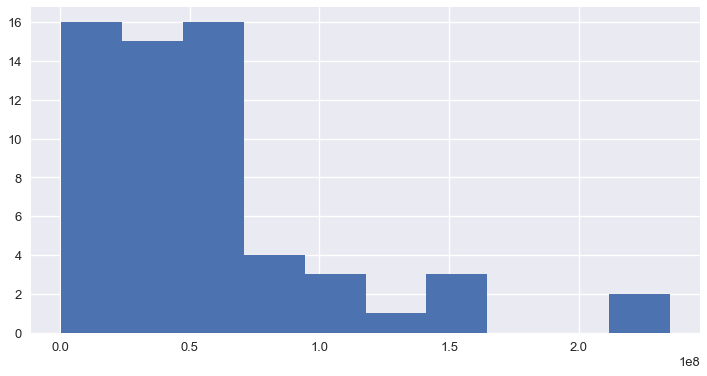

In [79]:
data.groupby("shop_id").money.sum().hist()

In [86]:
#Do prices change
data["price_change"]=~(data.groupby("item_id").item_price.agg(["max","min"]).pipe(lambda x: x["max"]-x["min"])==0)

In [88]:
data.groupby("item_id").item_price.agg(["max","min"]).pipe(lambda x: x["max"]-x["min"])==0

item_id
0         True
1         True
2         True
3        False
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27       False
28       False
29       False
         ...  
22140    False
22141    False
22142     True
22143    False
22144    False
22145    False
22146    False
22147    False
22148     True
22149    False
22150    False
22151    False
22152    False
22153    False
22154    False
22155    False
22156     True
22157    False
22158     True
22159     True
22160    False
22161     True
22162    False
22163    False
22164    False
22165     True
22166     True
22167    False
22168    False
22169     True
Length: 21807, dtype: bool

In [90]:
# Okay, let's try a KNN
#We know data is for 11-2015

In [97]:
data.drop(columns=["date","money","week","weekday","day"])

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,date_c,month,year,price_change
0,0,59,22154,999.00,1.0,37,2013-01-02,1,2013,False
1,0,24,22154,999.00,1.0,37,2013-01-23,1,2013,False
2,0,27,22154,999.00,1.0,37,2013-01-20,1,2013,False
3,0,25,22154,999.00,1.0,37,2013-01-02,1,2013,True
4,0,25,22154,999.00,1.0,37,2013-01-03,1,2013,False
5,0,25,22154,999.00,1.0,37,2013-01-20,1,2013,False
6,0,25,22154,999.00,1.0,37,2013-01-23,1,2013,False
7,0,25,22154,999.00,1.0,37,2013-01-26,1,2013,False
8,0,6,22154,999.00,1.0,37,2013-01-27,1,2013,False
9,0,15,22154,999.00,1.0,37,2013-01-10,1,2013,False


In [98]:
#Let's predict mean past novembers

In [230]:
predicted_fornov=(data
 .query("month==11")
 .groupby(["shop_id","item_id"])
 .item_cnt_day.mean()
 .unstack(level=0)
.reset_index()
 .melt(id_vars=["item_id"])
)

In [231]:
predicted_foroct=(data
 .query("month==10")
 .groupby(["shop_id","item_id"])
 .item_cnt_day.mean()
 .unstack(level=0)
.reset_index()
 .melt(id_vars=["item_id"])
)

In [232]:
t=test.merge(predicted_fornov,on=["shop_id","item_id"],how="left")
t_ok=t[~pd.isnull(t.value)]
t_next=t[pd.isnull(t.value)]

In [233]:
display(t_ok.count())
display(t_next.count())

ID         29841
shop_id    29841
item_id    29841
value      29841
dtype: int64

ID         184359
shop_id    184359
item_id    184359
value           0
dtype: int64

In [234]:
t2=t_next.drop(columns="value").merge(predicted_foroct,on=["shop_id","item_id"],how="left")
t2_ok=t2[~pd.isnull(t2.value)]
t2_next=t2[pd.isnull(t2.value)]

In [235]:
display(t2_ok.count())
display(t2_next.count())

ID         29742
shop_id    29742
item_id    29742
value      29742
dtype: int64

ID         154617
shop_id    154617
item_id    154617
value           0
dtype: int64

In [186]:
#For these, letś just assume mean

In [236]:
predicted_rest=(data
 .groupby(["shop_id","item_id"])
 .item_cnt_day.mean()
 .unstack(level=0).fillna(0)
 .reset_index()
 .melt(id_vars=["item_id"])
)

In [237]:
t3=t2_next.drop(columns="value").merge(predicted_rest,on=["shop_id","item_id"],how="left")
t3_ok=t3[~pd.isnull(t3.value)]
t3_next=t3[pd.isnull(t3.value)]

In [238]:
display(t3_ok.count())
display(t3_next.count())

ID         139371
shop_id    139371
item_id    139371
value      139371
dtype: int64

ID         15246
shop_id    15246
item_id    15246
value          0
dtype: int64

In [203]:
(pd.concat([t_ok,t2_ok,t3]).fillna(0)
 .assign(value=lambda x: x.value.clip(0,20))
 .sort_values("ID").drop(columns=["shop_id","item_id"])
 .rename(columns={"value":"item_cnt_month"})
 
).to_csv("submission.csv",index=False)

In [215]:
#Let's try fully aggregated
pred=(data
 .groupby(["shop_id","item_id"])
 .item_cnt_day.mean()
 .unstack(level=0)
 .reset_index()
 .melt(id_vars=["item_id"])
)


In [222]:
t=test.merge(pred,on=["shop_id","item_id"],how="left")
t=(t.assign(value=lambda x: x.value.clip(0,20))
 .sort_values("ID").drop(columns=["shop_id","item_id"])
 .rename(columns={"value":"item_cnt_month"})
 .fillna(0)
)
t.to_csv("submission_globalprediction.csv.gz",index=False,compression="gzip")

In [245]:
##Edgy clippig
t=(pd.concat([t_ok,t2_ok,t3])
 .assign(value=lambda x: x.value.clip(0,20))
 #.sort_values("ID").drop(columns=["shop_id","item_id"])
 #.rename(columns={"value":"item_cnt_month"})
 
)

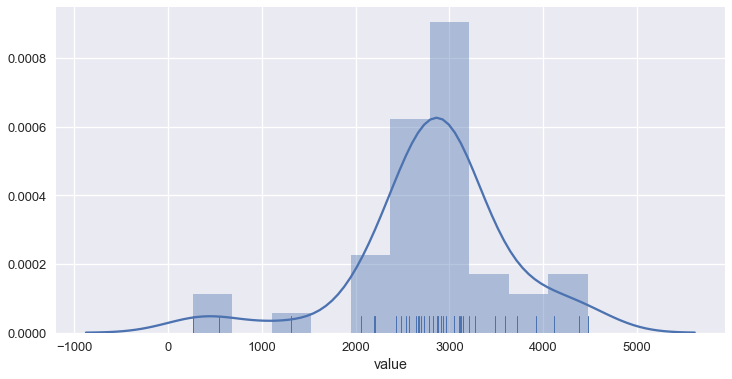

In [301]:
t.groupby("shop_id").value.sum().pipe(sns.distplot,bins=10,rug=True)
#There seem to be small and big shops. Let's say small=less 1000

In [309]:
def sizer(x):
    if x<1500:
        return "small"
    elif x<3100:
        return "medium"
    else:
        return "large"
shopsize=(t.groupby("shop_id").value.sum().to_frame()
 .assign(size=lambda x: x.value.apply(sizer)).reset_index().drop("value",axis=1)
)

In [325]:
imputed=(t.merge(shopsize,how="left").groupby(["size","item_id"])
 .value.mean().unstack(level=0).melt().reset_index()
 .rename(columns={"index":"item_id","value":"imputed"})
) 

In [343]:
imputed_all=(t.groupby(["item_id"])
 .value.mean().reset_index()
 .rename(columns={"index":"item_id","value":"imputed_all"})
) 

In [356]:
(t.merge(imputed[["item_id","imputed"]],how="left")
 .assign(value=lambda x: np.where(pd.isnull(x.value),x.imputed,x.value))
 .merge(imputed_all[["item_id","imputed_all"]])
 .assign(value=lambda x: np.where(pd.isnull(x.value),x.imputed_all,x.value)) 
 .assign(value=lambda x: np.where(pd.isnull(x.value),0,x.value)) 
[["ID","value"]]
 .sort_values("ID")
  .rename(columns={"value":"item_cnt_month"})
 
).to_csv("submission_meansbysize_0.csv.gz",index=False,compression="gzip")

    